### All standard imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from scipy import stats
import random
from sklearn import metrics
plt.rc('font', size = 8)
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Paired'))
sns.set()

### Preprocessing the dataset

In [3]:
data = pd.read_csv('Mydata.csv')
data = data.loc[:,(data != 0).any(axis = 0)]
unprocessed_dataset = data.loc[:,(data != 0).any(axis = 0)]

y = sorted(list(range(10)) *3)
sample_list = sorted(['L1T1', 'L1T2','L1T3', 'L1T4', 'L3T2', 'L3T3', 'L3T4', 'L5T3', 'L5T4', 'L7T4'] * 3)
sample_arr = np.array(sample_list)

unprocessed_dataset['y'] = y
dataset = unprocessed_dataset
X = dataset.iloc[:, :-1].values 
y_true = dataset.iloc[:, -1].values

### Standardization -  Feature scaling and shuffling the data to break the order in the samples

In [4]:
sc = StandardScaler()
scaled_data = sc.fit_transform(X)

train_data, test_data, y_train, y_test = train_test_split(scaled_data, y, test_size = 0)

sample_label = []
for i in y_train:
    if i == 0:
        sample_label.append('L1T1')
    elif i == 1:
        sample_label.append('L1T2')
    elif i == 2:
        sample_label.append('L1T3')
    elif i == 3:
        sample_label.append('L1T4')
    elif i == 4:
        sample_label.append('L3T2')
    elif i == 5:
        sample_label.append('L3T3')
    elif i == 6:
        sample_label.append('L3T4')
    elif i == 7:
        sample_label.append('L5T3')
    elif i == 8:
        sample_label.append('L5T4')
    elif i == 9:
        sample_label.append('L7T4')

### Plotting the raw data

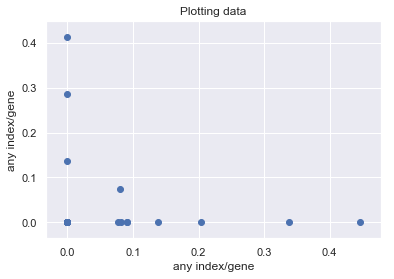

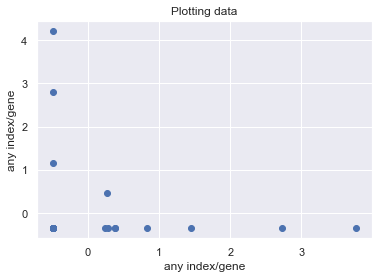

In [5]:
def plotRawData(input_data, x_cor, y_cor):
    """data has to be an array"""
    plt.figure()
    plt.scatter(input_data[:, x_cor], input_data[:, y_cor])
    plt.xlabel('any index/gene')
    plt.ylabel('any index/gene')
    plt.title('Plotting data')
    return plt.show()

plotRawData(X, 1, 20)
plotRawData(scaled_data, 1, 20)

### Correlation measure

In [6]:
from scipy import stats
print('Pearson Correlation: ', stats.pearsonr(X[:, 0], X[:, 1]))
stats.spearmanr(X[:, 0], X[:, 1])

Pearson Correlation:  (-0.34059565922296764, 0.06551097529476643)


SpearmanrResult(correlation=-0.04966323256374438, pvalue=0.7943863373991878)

### Distribution of the raw data

Statistics=0.953, p=0.204


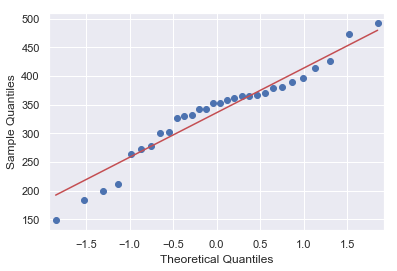

In [7]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot # q-q plot

stat, p = shapiro(X[:,0])
print('Statistics=%.3f, p=%.3f' % (stat, p))

qqplot(X[:,0], line='s')
plt.show()

### Working with the raw data

In [8]:
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
axes_pos = np.arange(len(pcs))

In [9]:
def dimensionReduction(input_data):
    """input_data as the train_data with train_test_split random suffling of the data.
    """
    pca = PCA(n_components = 10)
    pca_transformed = pca.fit_transform(input_data)
    
    kpca = KernelPCA(n_components = 5, kernel = 'rbf')
    kpca_transformed = kpca.fit_transform(input_data)
    
    tsne = TSNE(n_components = 2, n_iter = 200000, perplexity = 9, init = 'pca')
    tsne_transformed = tsne.fit_transform(input_data)
    
    return pca_transformed, kpca_transformed, tsne_transformed

In [10]:
def kMeans(m_data):
    """Use this KMeans function on the transformed data."""
    kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 100)
    y_km = kmeans.fit_predict(m_data)
    
    return y_km

In [11]:
def clusterVisualization(input_data, pc1_ind, pc2_ind, y_true):
    """Visualization of the data using the transformed data from PCA,KPCA,TSNE"""
    fig, ax = plt.subplots(figsize = (12,8))
    plt.rc('font', size = 8)
    plt.scatter(input_data[:,pc1_ind], input_data[:,pc2_ind], c = y_true, s = 200, cmap = 'tab10', alpha = 0.7)
    plt.xlabel(pcs[pc1_ind])
    plt.ylabel(pcs[pc2_ind])
    plt.title(pcs[pc1_ind] + ' v ' + pcs[pc2_ind])
    plt.colorbar()
    for i, txt in enumerate(sample_label):
        ax.annotate(txt, (input_data[:,pc1_ind][i], input_data[:,pc2_ind][i]))
    return plt.show()

In [12]:
def clusteringAccuracy(y_true, y_pred):
    adjusted_rand_score = metrics.adjusted_rand_score(y_true, y_pred)
    a = print('Adjusted rand score for KMeans using KernelPCA {}.'.format(adjusted_rand_score))
    
    homogeneity_score, completeness_score, V_score = metrics.homogeneity_completeness_v_measure(y_true, y_pred)
    h = print('Homogeneity score for KMeans using KernelPCA {}.'.format(homogeneity_score))
    c = print('Completeness info score for KMeans using KernelPCA {}.'.format(completeness_score))
    
    return a, h, c

In [13]:
pca_data, kpca_data, tsne_data = dimensionReduction(train_data)

In [14]:
y_tsne = kMeans(tsne_data)

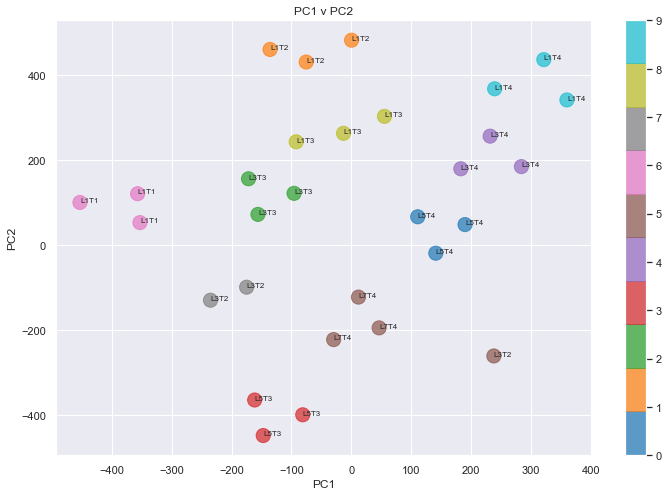

In [15]:
clusterVisualization(tsne_data, 0, 1, y_tsne)

In [16]:
clusteringAccuracy(y_train, y_tsne)

Adjusted rand score for KMeans using KernelPCA 0.9118541033434651.
Homogeneity score for KMeans using KernelPCA 0.9674374599615713.
Completeness info score for KMeans using KernelPCA 0.9722198882874836.


(None, None, None)

### Creating fake samples to test
loading the data from the beginning makes it easier to deal with the task.

In [17]:
data = pd.read_csv('Mydata.csv')
data = data.loc[:,(data != 0).any(axis = 0)]
unprocessed_dataset = data.loc[:,(data != 0).any(axis = 0)]

y = sorted(list(range(10)) *3)
sample_list = sorted(['L1T1', 'L1T2','L1T3', 'L1T4', 'L3T2', 'L3T3', 'L3T4', 'L5T3', 'L5T4', 'L7T4'] * 3)
sample_arr = np.array(sample_list)

unprocessed_dataset['y'] = y
dataset = unprocessed_dataset
X = dataset.iloc[:, :-1].values 
y_true = dataset.iloc[:, -1].values

In [18]:
def nFakeSamples(n, class1, class2):
    
    test_sample = np.zeros((n, class1.shape[1]))
    
    for j in test_sample:    
        for i in range(class1.shape[1]):
            rand = random.random()
            if rand <= 0.20:
                j[i] = random.uniform(np.amin(class2[:,i]), np.amax(class2[:,i]))
            else:
                j[i] = random.uniform(np.amin(class1[:,i]), np.amax(class1[:,i]))
            
    test_sample = test_sample.reshape(n, -1)
    return test_sample

In [19]:
class_1 = X[[0, 1, 2], :]
class_2 = X[[3 , 4, 5], :]
test_sample = nFakeSamples(2, class_1, class_2)

test_sample_label = []
for i in range(1, len(test_sample) + 1):
    test_sample_label.append('T_S_{}'.format(i))

In [20]:
sc = StandardScaler()
scaled_data = sc.fit_transform(X)
scaled_test = sc.transform(test_sample)

train_data, test_data, y_train, y_test = train_test_split(scaled_data, y, test_size = 0)

combined_data = np.append(train_data, scaled_test, axis = 0)

sample_label = []
for i in y_train:
    if i == 0:
        sample_label.append('L1T1')
    elif i == 1:
        sample_label.append('L1T2')
    elif i == 2:
        sample_label.append('L1T3')
    elif i == 3:
        sample_label.append('L1T4')
    elif i == 4:
        sample_label.append('L3T2')
    elif i == 5:
        sample_label.append('L3T3')
    elif i == 6:
        sample_label.append('L3T4')
    elif i == 7:
        sample_label.append('L5T3')
    elif i == 8:
        sample_label.append('L5T4')
    elif i == 9:
        sample_label.append('L7T4')

In [27]:
kpca = KernelPCA(n_components = 5, kernel = 'rbf')
kpca_ = kpca.fit_transform(combined_data)
kpca_train = kpca_[:30,:]
kpca_test = kpca_[30:,:]

tsne = TSNE(n_components = 2, n_iter = 200000, perplexity = 9, init = 'pca')
tsne_ = tsne.fit_transform(combined_data)
tsne_train = tsne_[:30,:]
tsne_test = tsne_[30:,:]


In [28]:
tsne_test.shape

(2, 2)

In [31]:
def train_test_result(train_data, test_data):
    kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 100)
    y_train = kmeans.fit_predict(train_data)
    y_test = kmeans.predict(test_data)
    
    plt.rc('font', size = 10)    
    fig, ax = plt.subplots(figsize = (14,10))
    plt.scatter(train_data[:,0], train_data[:,1], c = y_train, s = 200, cmap = plt.get_cmap('tab10', 10), alpha = 0.7)
    plt.scatter(test_data[:,0], test_data[:,1], c = y_test, s = 200, cmap = plt.get_cmap('tab10', 10), alpha = 0.7)
    
    for i, txt in enumerate(sample_label):
        ax.annotate(txt, (train_data[:,0][i], train_data[:,1][i]))
        
    for j, txt in enumerate(test_sample_label):
        ax.annotate(txt, (test_data[:,0][j], test_data[:,1][j]))
        
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.colorbar(ticks = range(10), label = 'Clusters')
    plt.clim(0,10)
    plt.title('KMeans clustering')
    return y_train, y_test, plt.show()

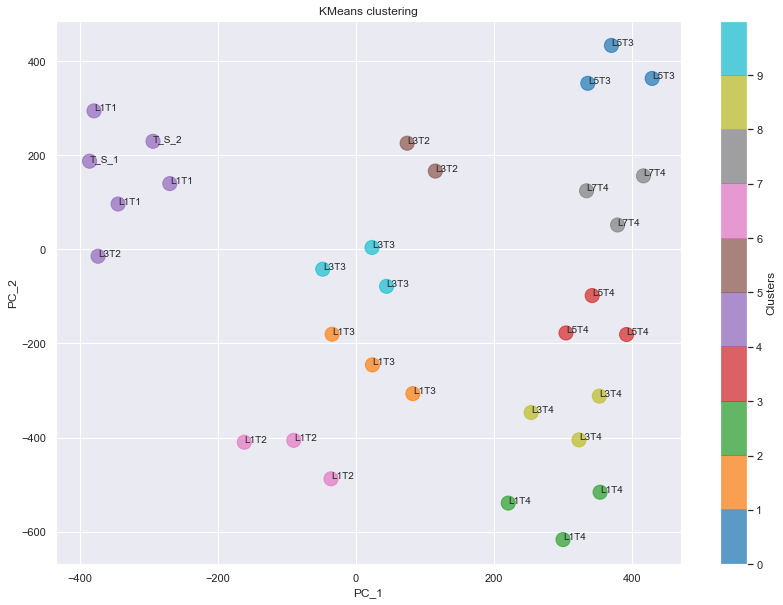

(array([7, 3, 4, 1, 1, 2, 9, 2, 6, 6, 8, 5, 6, 0, 1, 7, 9, 4, 2, 4, 8, 0,
        5, 7, 8, 3, 3, 0, 9, 4]), array([4, 4]), None)

In [32]:
train_test_result(tsne_train, tsne_test)